# Train Test Splits, Cross Validation, and Linear Regression

![Lregressions.png](Assets/LinearRegr.png)

# Learning Objectives

- Explain the difference between over-fitting and under-fitting a model
- Describe Bias-variance tradeoffs
- Find the optimal training and test data set splits, cross-validation, and model complexity versus error
- Apply a linear regression model for supervised learning
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn* 

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written. 

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed. 

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems. 

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code prior to importing sklearn: 

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions

## Introduction

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

### Predictor

* SalePrice: The property's sale price in dollars. 


### Features

<table>
  <tbody>    
    <tr valign="top">
      <td valign="top">
        <ul>
          <li>MoSold: Month Sold</li>
          <li>YrSold: Year Sold</li><br>
          
          <li>SaleType: Type of sale</li>
          <li>SaleCondition: Condition of sale</li><br>

          <li>MSSubClass: The building class</li>
          <li>MSZoning: The general zoning classification</li><br>

          <li>Neighborhood: Physical locations within Ames city limits</li>
          <li>Street: Type of road access</li>
          <li>Alley: Type of alley access</li><br>

          <li>LotArea: Lot size in square feet</li>
          <li>LotConfig: Lot configuration</li>
          <li>LotFrontage: Linear feet of street connected to property</li>
          <li>LotShape: General shape of property</li><br>

          <li>LandSlope: Slope of property</li>
          <li>LandContour: Flatness of the property</li><br>

          <li>YearBuilt: Original construction date</li>
          <li>YearRemodAdd: Remodel date</li>
          <li>OverallQual: Overall material and finish quality</li>
          <li>OverallCond: Overall condition rating</li><br>

          <li>Utilities: Type of utilities available</li>
          <li>Foundation: Type of foundation</li>
          <li>Functional: Home functionality rating</li><br>

          <li>BldgType: Type of dwelling</li>
          <li>HouseStyle: Style of dwelling</li><br>
          
          <li>1stFlrSF: First Floor square feet</li>
          <li>2ndFlrSF: Second floor square feet</li>
          <li>LowQualFinSF: Low quality finished square feet (all floors)</li>
          <li>GrLivArea: Above grade (ground) living area square feet</li>
          <li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li><br>

          <li>Condition1: Proximity to main road or railroad</li>
          <li>Condition2: Proximity to main road or railroad (if a second is present)</li><br>
          
          <li>RoofStyle: Type of roof</li>
          <li>RoofMatl: Roof material</li><br>

          <li>ExterQual: Exterior material quality</li>
          <li>ExterCond: Present condition of the material on the exterior</li>
          <li>Exterior1st: Exterior covering on house</li>
          <li>Exterior2nd: Exterior covering on house (if more than one material)</li><br><br>
          
        </ul>
      </td>
      
      <td valign="top">
        <ul>
          <li>MasVnrType: Masonry veneer type</li>
          <li>MasVnrArea: Masonry veneer area in square feet</li><br>
          
          <li>WoodDeckSF: Wood deck area in square feet</li>
          <li>OpenPorchSF: Open porch area in square feet</li>
          <li>EnclosedPorch: Enclosed porch area in square feet</li>
          <li>3SsnPorch: Three season porch area in square feet</li>
          <li>ScreenPorch: Screen porch area in square feet</li><br>

          <li>PoolArea: Pool area in square feet</li>
          <li>PoolQC: Pool quality</li>
          <li>Fence: Fence quality</li>
          <li>PavedDrive: Paved driveway</li><br>

          <li>GarageType: Garage location</li>
          <li>GarageYrBlt: Year garage was built</li>
          <li>GarageFinish: Interior finish of the garage</li>
          <li>GarageCars: Size of garage in car capacity</li>
          <li>GarageArea: Size of garage in square feet</li>
          <li>GarageQual: Garage quality</li>
          <li>GarageCond: Garage condition</li><br>

          <li>Heating: Type of heating</li>
          <li>HeatingQC: Heating quality and condition</li>
          <li>CentralAir: Central air conditioning</li>
          <li>Electrical: Electrical system</li><br>
          
          <li>FullBath: Full bathrooms above grade</li>
          <li>HalfBath: Half baths above grade</li><br>
          
          <li>BedroomAbvGr: Number of bedrooms above basement level</li><br>
          
          <li>KitchenAbvGr: Number of kitchens</li>
          <li>KitchenQual: Kitchen quality</li><br>
          
          <li>Fireplaces: Number of fireplaces</li>
          <li>FireplaceQu: Fireplace quality</li><br>
          
          <li>MiscFeature: Miscellaneous feature not covered in other categories</li>
          <li>MiscVal: Value of miscellaneous feature</li><br>
          
          <li>BsmtQual: Height of the basement</li>
          <li>BsmtCond: General condition of the basement</li>
          <li>BsmtExposure: Walkout or garden level basement walls</li>
          <li>BsmtFinType1: Quality of basement finished area</li>
          <li>BsmtFinSF1: Type 1 finished square feet</li>
          <li>BsmtFinType2: Quality of second finished area (if present)</li>
          <li>BsmtFinSF2: Type 2 finished square feet</li>
          <li>BsmtUnfSF: Unfinished square feet of basement area</li>
          <li>BsmtFullBath: Basement full bathrooms</li>
          <li>BsmtHalfBath: Basement half bathrooms</li>
          <li>TotalBsmtSF: Total square feet of basement area</li>
        </ul>
      </td>
    </tr>
    
  </tbody>
</table>


## Question 1

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`). 
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/Ames_Housing_Sales.csv')
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [3]:
df.shape

(1379, 80)

In [4]:
df.dtypes.value_counts()

object     43
float64    21
int64      16
Name: count, dtype: int64

## Question 2

As discussed in the lecture, a significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly. 

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.

In [5]:
# Count the number of unique categories for each categorical  (object) column
categorical_columns = df.select_dtypes(include=['object'])
one_hot_encoded_feature_count = sum(categorical_columns.nunique() - 1)

# Calculate total features after encoding
total_features_after_encoding = df.shape[1] - len(categorical_columns.columns) + one_hot_encoded_feature_count

one_hot_encoded_feature_count, total_features_after_encoding

(204, 241)

## Question 3

Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
* For the data that are not one-hot encoded, drop the columns that are string categoricals.

For the first step, numerically encoding the string categoricals, either Scikit-learn;s `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
df_encoded = df.copy()
categorical_columns = df_encoded.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df_encoded[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns), index=df_encoded.index)
df_encoded = df_encoded.drop(columns=categorical_columns).join(encoded_df)
df_encoded.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Question 4

* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* For each data set, fit a basic linear regression model on the training data. 
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Target variable
target = 'SalePrice'

# For the original df (without encoding), DROP string columns
X = df.select_dtypes(exclude=['object']).drop(columns=[target])
y = df[target]

# For the encoded df
X_encoded = df_encoded.drop(columns=[target])
y_encoded = df_encoded[target]

# Train-test splits (same random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Linear Regression models
lr = LinearRegression()
lr_enc = LinearRegression()

# Fit models
lr.fit(X_train, y_train)
lr_enc.fit(X_train_enc, y_train_enc)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

y_train_pred_enc = lr_enc.predict(X_train_enc)
y_test_pred_enc = lr_enc.predict(X_test_enc)

# Mean Squared Errors
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_train_enc = mean_squared_error(y_train_enc, y_train_pred_enc)
mse_test_enc = mean_squared_error(y_test_enc, y_test_pred_enc)

# Results
print("Without Encoding:")
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")

print("\nWith One-Hot Encoding:")
print(f"Train MSE: {mse_train_enc:.2f}")
print(f"Test MSE: {mse_test_enc:.2f}")


Without Encoding:
Train MSE: 1122754038.21
Test MSE: 1480325423.71

With One-Hot Encoding:
Train MSE: 352247070.61
Test MSE: 3167342846.74


Note that the error values on the one-hot encoded data are very different for the train and test data. In particular, the errors on the test data are much higher. Based on the lecture, this is because the one-hot encoded model is overfitting the data. We will learn how to deal with issues like this in the next lesson.

## Question 5

For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Compare the error calculated on the test sets

Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

def calculate_skew(data):
    return data.skew()
lr = LinearRegression()

results = {}

for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lr.fit(X_train_scaled, y_train)
    y_train_pred = lr.predict(X_train_scaled)
    y_test_pred = lr.predict(X_test_scaled)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    results[f"Non-encoded with {scaler_name}"] = {'Train MSE': mse_train, 'Test MSE': mse_test}

# Scaling for encoded data
for scaler_name, scaler in scalers.items():
    
    X_train_enc_scaled = scaler.fit_transform(X_train_enc)
    X_test_enc_scaled = scaler.transform(X_test_enc)
    lr.fit(X_train_enc_scaled, y_train_enc)
    
    y_train_pred_enc = lr.predict(X_train_enc_scaled)
    y_test_pred_enc = lr.predict(X_test_enc_scaled)
    
    mse_train_enc = mean_squared_error(y_train_enc, y_train_pred_enc)
    mse_test_enc = mean_squared_error(y_test_enc, y_test_pred_enc)
    
    results[f"Encoded with {scaler_name}"] = {'Train MSE': mse_train_enc, 'Test MSE': mse_test_enc}

# Print all the results
for key, value in results.items():
    print(f"{key}:")
    print(f"  Train MSE: {value['Train MSE']:.2f}")
    print(f"  Test MSE: {value['Test MSE']:.2f}")
    print()

# Skewness calculation for the numeric columns
skewness_original = calculate_skew(X)
skewness_encoded = calculate_skew(X_encoded)

# Display skewness of the features
print("Skewness for original data (non-encoded):")
print(skewness_original)
print("\nSkewness for encoded data:")
print(skewness_encoded)

Non-encoded with StandardScaler:
  Train MSE: 1122754038.21
  Test MSE: 1480325423.71

Non-encoded with MinMaxScaler:
  Train MSE: 1122754038.21
  Test MSE: 1480325423.71

Non-encoded with MaxAbsScaler:
  Train MSE: 1122754038.21
  Test MSE: 1480325423.71

Encoded with StandardScaler:
  Train MSE: 352247070.61
  Test MSE: 3166723003.94

Encoded with MinMaxScaler:
  Train MSE: 352247070.61
  Test MSE: 3167342846.73

Encoded with MaxAbsScaler:
  Train MSE: 352247070.61
  Test MSE: 3167342846.73

Skewness for original data (non-encoded):
1stFlrSF          1.390283
2ndFlrSF          0.786109
3SsnPorch        10.007116
BedroomAbvGr     -0.011947
BsmtFinSF1        1.678351
BsmtFinSF2        4.194649
BsmtFullBath      0.488117
BsmtHalfBath      3.917582
BsmtUnfSF         0.927963
EnclosedPorch     3.213038
Fireplaces        0.586047
FullBath         -0.015812
GarageArea        0.811037
GarageCars        0.194080
GarageYrBlt      -0.649415
GrLivArea         1.411296
HalfBath          0.580327


## Question 6

Plot predictions vs actual for one of the models.

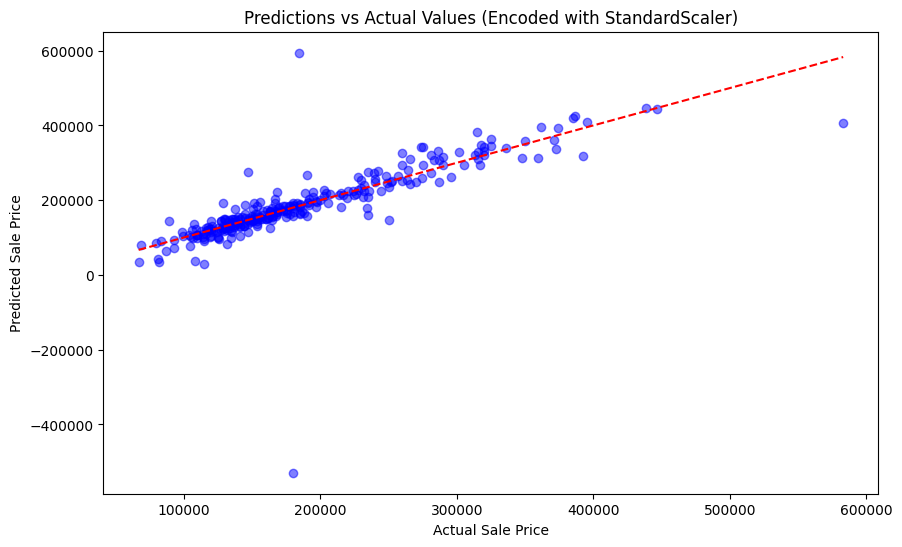

In [13]:
import matplotlib.pyplot as plt
model_name = 'Encoded with StandardScaler'
y_test_pred_enc = lr.predict(X_test_enc_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_enc, y_test_pred_enc, color='blue', alpha=0.5)
plt.plot([min(y_test_enc), max(y_test_enc)], [min(y_test_enc), max(y_test_enc)], color='red', linestyle='--')  # Diagonal line
plt.title(f"Predictions vs Actual Values ({model_name})")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()
